# Manual, bottom-up creation of a polyphenylene-sulfone middle repeat unit fragment from MuPT core components

In [1]:
import logging
logging.basicConfig(level=logging.INFO, force=True)
logging.getLogger('matplotlib.font_manager').setLevel(logging.WARNING)

## Define unique types of bond (by end atom types)

In [2]:
from rdkit.Chem import BondType
from mupt.mupr.connection import Connector


arene_H_bond = Connector('H', linkables={'c'}, bondtype=BondType.SINGLE)
arene_c_bond = Connector('c', linkables={'c'}, bondtype=BondType.AROMATIC)
arene_substituent_bond = Connector('c', linkables={'H', 'S', '*'}, bondtype=BondType.SINGLE)

sulfonyl_c_bond = Connector('S', linkables={'c'}, bondtype=BondType.SINGLE)
sulfonyl_S_bond = Connector('S', linkables={'O'}, bondtype=BondType.DOUBLE)
sulfonyl_O_bond = Connector('O', linkables={'S'}, bondtype=BondType.DOUBLE)

INFO:rdkit:Enabling RDKit 2025.03.4 jupyter extensions


## Define atomic Primitives, loosely representing unique chemical environments for atoms

In [3]:
from periodictable import elements
from mupt.mupr.primitives import Primitive


arene_carbon = Primitive(
    element=elements[6],
    connectors=[
        arene_substituent_bond.copy(),
        arene_c_bond.copy(),
        arene_c_bond.copy(),
    ],
    label='c',
)
arene_hydrogen = Primitive(
    element=elements[1],
    connectors=[
        arene_H_bond.copy(),
    ],
    label='H',
)
sulfur = Primitive(
    element=elements[16],
    connectors=[
        sulfonyl_c_bond.copy(),
        sulfonyl_c_bond.copy(),
        sulfonyl_S_bond.copy(),
        sulfonyl_S_bond.copy(),
    ],
    label='S',
)
terminal_oxygen = Primitive(
    element=elements[8],
    connectors=[
        sulfonyl_O_bond.copy(),
    ],
    label='O',
)
unique_prims : list[Primitive] = [arene_carbon, arene_hydrogen, sulfur, terminal_oxygen]
prim_map : dict[str, Primitive] = {prim.label: prim for prim in unique_prims}

## Manually build up chemical graph

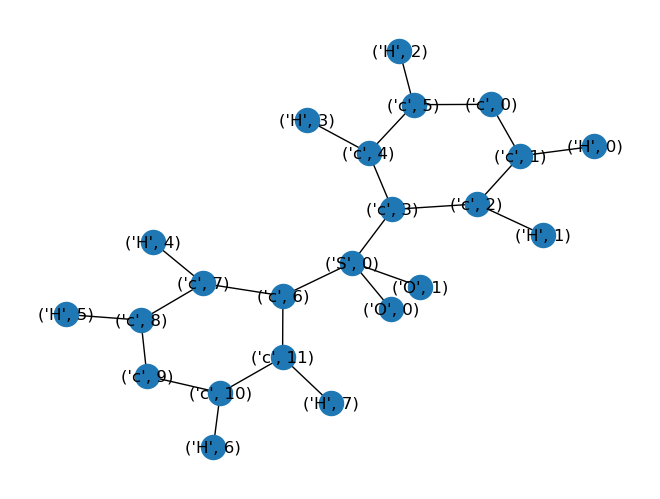

In [4]:
import networkx as nx
from mupt.mupr.topology import TopologicalStructure


mol_graph = TopologicalStructure()

elem_counts : dict[str, int] = { # analogous to a Hill formula
    'c' : 12,
    'H' : 8,
    'O' : 2,
    'S' : 1,
}
for symbol, count in elem_counts.items():
    for i in range(count):
        mol_graph.add_node( (symbol, i) )

## arene 1
mol_graph.add_edges_from([
    (('c', 0), ('c', 1)),
    (('c', 1), ('c', 2)),
    (('c', 1), ('H', 0)),
    (('c', 2), ('c', 3)),
    (('c', 2), ('H', 1)),
    (('c', 3), ('c', 4)),
    (('c', 4), ('c', 5)),
    (('c', 4), ('H', 3)),
    (('c', 5), ('c', 0)),
    (('c', 5), ('H', 2)),
])

## arene 2
mol_graph.add_edges_from([
    (('c',  6), ('c', 7)),
    (('c',  7), ('c', 8)),
    (('c',  7), ('H', 4)),
    (('c',  8), ('c', 9)),
    (('c',  8), ('H', 5)),
    (('c',  9), ('c', 10)),
    (('c', 10), ('c', 11)),
    (('c', 10), ('H', 6)),
    (('c', 11), ('c', 6)),
    (('c', 11), ('H', 7)),
])

## sulfonyl
mol_graph.add_edges_from([
    (('S', 0), ('O', 0)),
    (('S', 0), ('O', 1)),
])

## bringing it all together
mol_graph.add_edges_from([
    (('S', 0), ('c', 3)),
    (('S', 0), ('c', 6)),
])

pos = nx.kamada_kawai_layout(mol_graph)
nx.draw(mol_graph, pos=pos, with_labels=True)

## Initialize molecule-level primitive, embed component info within

In [5]:
## register atoms as children
molprim = Primitive(
    connectors=[ # because this is a fragment, also include the two off-molecule connections at the molecule resolution
       arene_substituent_bond.copy(),  
       arene_substituent_bond.copy(),  
    ],
    label='phenylene sulfone middle monomer',
)

for node_label in mol_graph.nodes:
    symbol, subindex = node_label
    
    subprim = prim_map[symbol].copy()
    subprim.label = node_label
    subprim.parent = molprim
    print(subprim)
    # mol_graph.nodes[node_label]['primitive'] = subprim

# impose bonded topology onto children
molprim.topology = mol_graph

C(SINGLE:1-AROMATIC:2)[NoneType]<de75f5edfabdb0477e652512e4287161>-('c', 0)
C(SINGLE:1-AROMATIC:2)[NoneType]<de75f5edfabdb0477e652512e4287161>-('c', 1)
C(SINGLE:1-AROMATIC:2)[NoneType]<de75f5edfabdb0477e652512e4287161>-('c', 2)
C(SINGLE:1-AROMATIC:2)[NoneType]<de75f5edfabdb0477e652512e4287161>-('c', 3)
C(SINGLE:1-AROMATIC:2)[NoneType]<de75f5edfabdb0477e652512e4287161>-('c', 4)
C(SINGLE:1-AROMATIC:2)[NoneType]<de75f5edfabdb0477e652512e4287161>-('c', 5)
C(SINGLE:1-AROMATIC:2)[NoneType]<de75f5edfabdb0477e652512e4287161>-('c', 6)
C(SINGLE:1-AROMATIC:2)[NoneType]<de75f5edfabdb0477e652512e4287161>-('c', 7)
C(SINGLE:1-AROMATIC:2)[NoneType]<de75f5edfabdb0477e652512e4287161>-('c', 8)
C(SINGLE:1-AROMATIC:2)[NoneType]<de75f5edfabdb0477e652512e4287161>-('c', 9)
C(SINGLE:1-AROMATIC:2)[NoneType]<de75f5edfabdb0477e652512e4287161>-('c', 10)
C(SINGLE:1-AROMATIC:2)[NoneType]<de75f5edfabdb0477e652512e4287161>-('c', 11)
H(SINGLE:1)[NoneType]<de75f5edfabdb0477e652512e4287161>-('H', 0)
H(SINGLE:1)[NoneType]

/home/timber/miniconda3/envs/mupt-dev/lib/python3.13/site-packages/networkx/algorithms/graph_hashing.py:211: UserWarning: The hashes produced for graphs without node or edge attributeschanged in v3.5 due to a bugfix (see documentation).
  node_labels = _init_node_labels(G, edge_attr, node_attr)


2


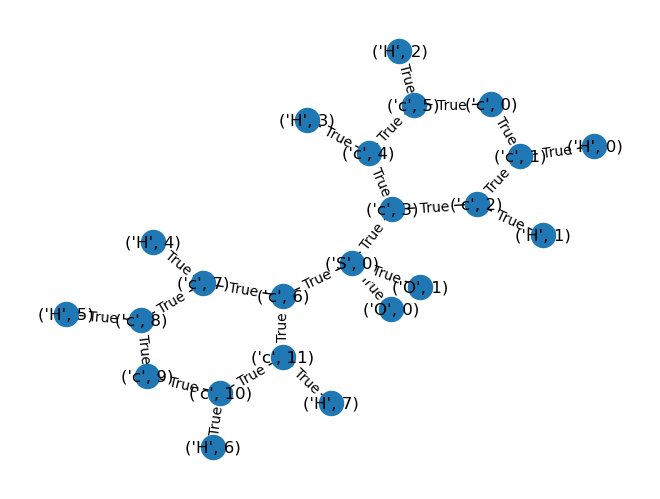

In [6]:
print(len(molprim.external_connectors))

pos = nx.kamada_kawai_layout(mol_graph)
nx.draw(mol_graph, pos, with_labels=True)
_ = nx.draw_networkx_edge_labels(
    mol_graph,
    pos=pos,
    edge_labels={edge : bool(pair) for edge, pair in molprim.paired_connectors.items()},
)

In [7]:
molprim.paired_connectors[('c', 6), ('S', 0)]

(Connector(anchor='c', linker=None, linkables={'*', 'S', 'H'}, bondtype=rdkit.Chem.rdchem.BondType.SINGLE, query_smarts='', linker_position=None, anchor_position=None, tangent_position=None),
 Connector(anchor='S', linker=None, linkables={'c'}, bondtype=rdkit.Chem.rdchem.BondType.SINGLE, query_smarts='', linker_position=None, anchor_position=None, tangent_position=None))

## Make a copy of the molecule-level primitive and translate it uniformly
Note: what is currently drawn is not the coordinates of the molecule, but just a visually easy-to-parse embedding of its topology graph

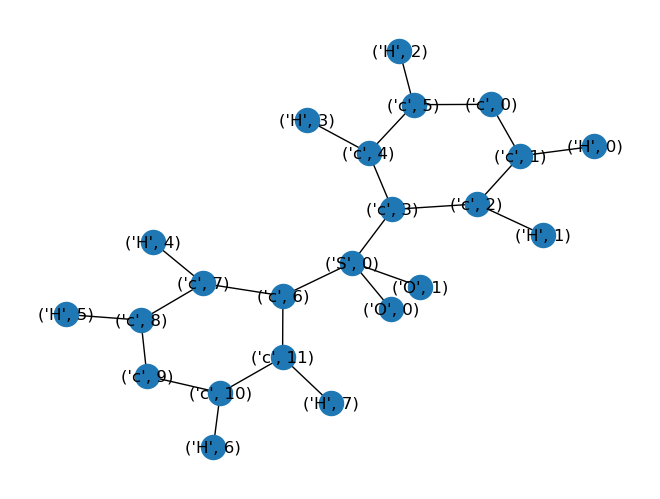

In [8]:
import numpy as np
from scipy.spatial.transform import RigidTransform


transform = RigidTransform.from_translation(np.array([5.0, 0.0, 0.0]))
molprim_copy = molprim.rigidly_transformed(transform)

pos = nx.kamada_kawai_layout(molprim_copy.topology)
nx.draw(molprim_copy.topology, pos, with_labels=True)